# CREDIT CARD FRAUD DETECTION

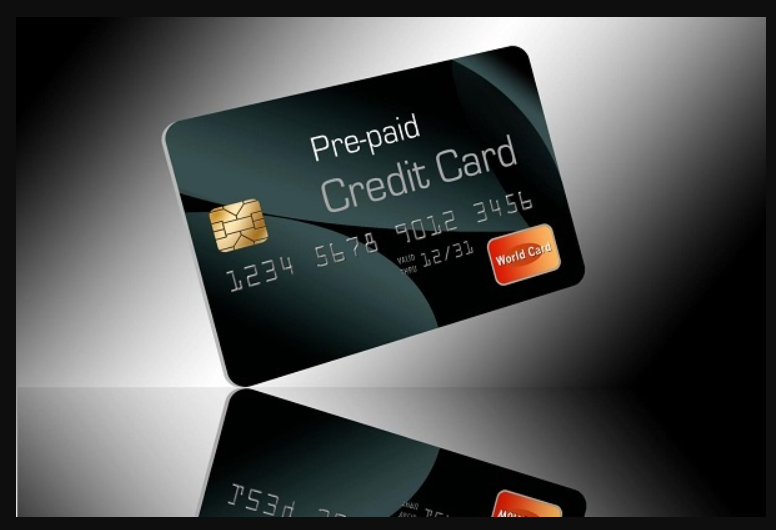

We need to find anomalies in the system for the companies that have a lot of transactions with the use of cards.

The project aims to build a credit card fraud detection model, which tells us if the transaction made by the card is fraud or not. So basically we will use the transaction and their labels as fraud or non-fraud to detect if the new transaction made by the customer is fraud or not.

To prevent customers from being charged for the items they did not purchase, It is important for credit card companies to recognize fraudulent credit card transactions.

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
import sklearn
from sklearn.preprocessing import StandardScaler

## 2. Load Dataset

In [2]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## 3. Analysis and Visualization of the Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
x = data.iloc[: , 1:30].values
y = data.iloc[:, 30].values
print("Input Range : ", x.shape)
print("Output Range : ", y.shape)

Input Range :  (284807, 29)
Output Range :  (284807,)


In [5]:
print ("Class Labels : \n", y)

Class Labels : 
 [0 0 0 ... 0 0 0]


In [6]:
#No missing value
data.isnull().values.any()

False

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# Separating the data:
normal = data[data.Class == 0]
fraud = data[data.Class == 1]
# check shape
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


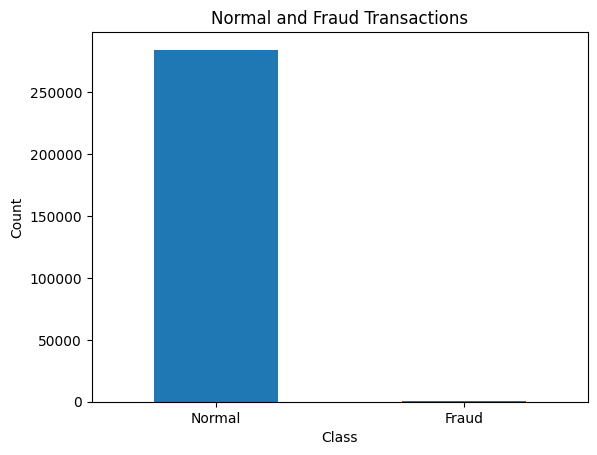

In [9]:
#visualize the data:
labels = ["Normal", "Fraud"]
count_classes = data.value_counts(data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Normal and Fraud Transactions")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

### Insight:
The graph is crucial for understanding the class distribution of the dataset. In an ideal scenario, the majority of transactions should be labeled as "Normal," as fraudulent transactions are generally much less frequent than legitimate ones. Therefore, it is expected to see a significant difference in the height of the bars.

In summary, this graph visually represents the distribution of normal and fraudulent transactions, allowing for a quick assessment of class balance in the dataset and providing insights into the potential challenges faced in credit card fraud detection.

In [10]:
# statistical measures of the data:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

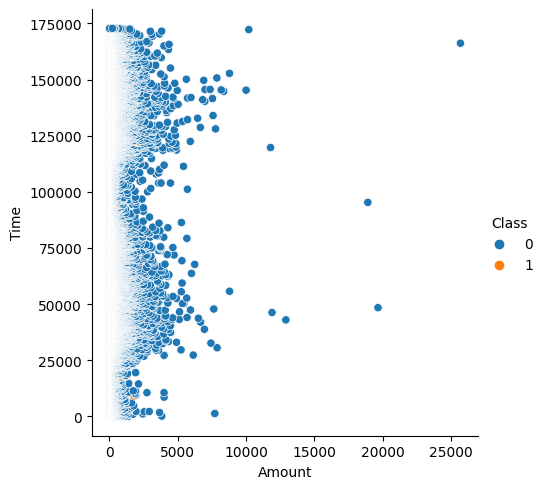

In [12]:
# visualize the data using seaborn:
sns.relplot(x = 'Amount' , y = 'Time' , hue = 'Class', data = data)

### Insight:
The x-axis represents the transaction amount, while the y-axis represents the time of the transactions. The points on the plot are color-coded based on the 'Class' variable, indicating "Normal" and "Fraud" transactions. This visualization offers insights into any patterns or trends between transaction amount and time, potential outliers in the data, and how fraudulent transactions are distributed concerning 'Amount' and 'Time'. Additionally, it helps assess class imbalance and understand the potential impact on model training and evaluation. The scatter plot serves as a valuable tool to gain a comprehensive understanding of the dataset and identify crucial factors for effective credit card fraud detection.

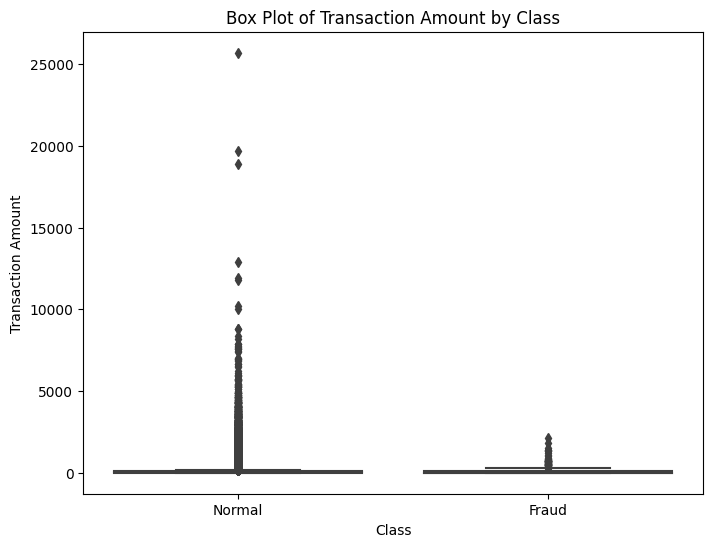

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Box Plot of Transaction Amount by Class")
plt.xlabel("Class")
plt.ylabel("Transaction Amount")
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.show()

### Insight:
This plot shows the distribution of transaction amounts for both normal and fraudulent transactions

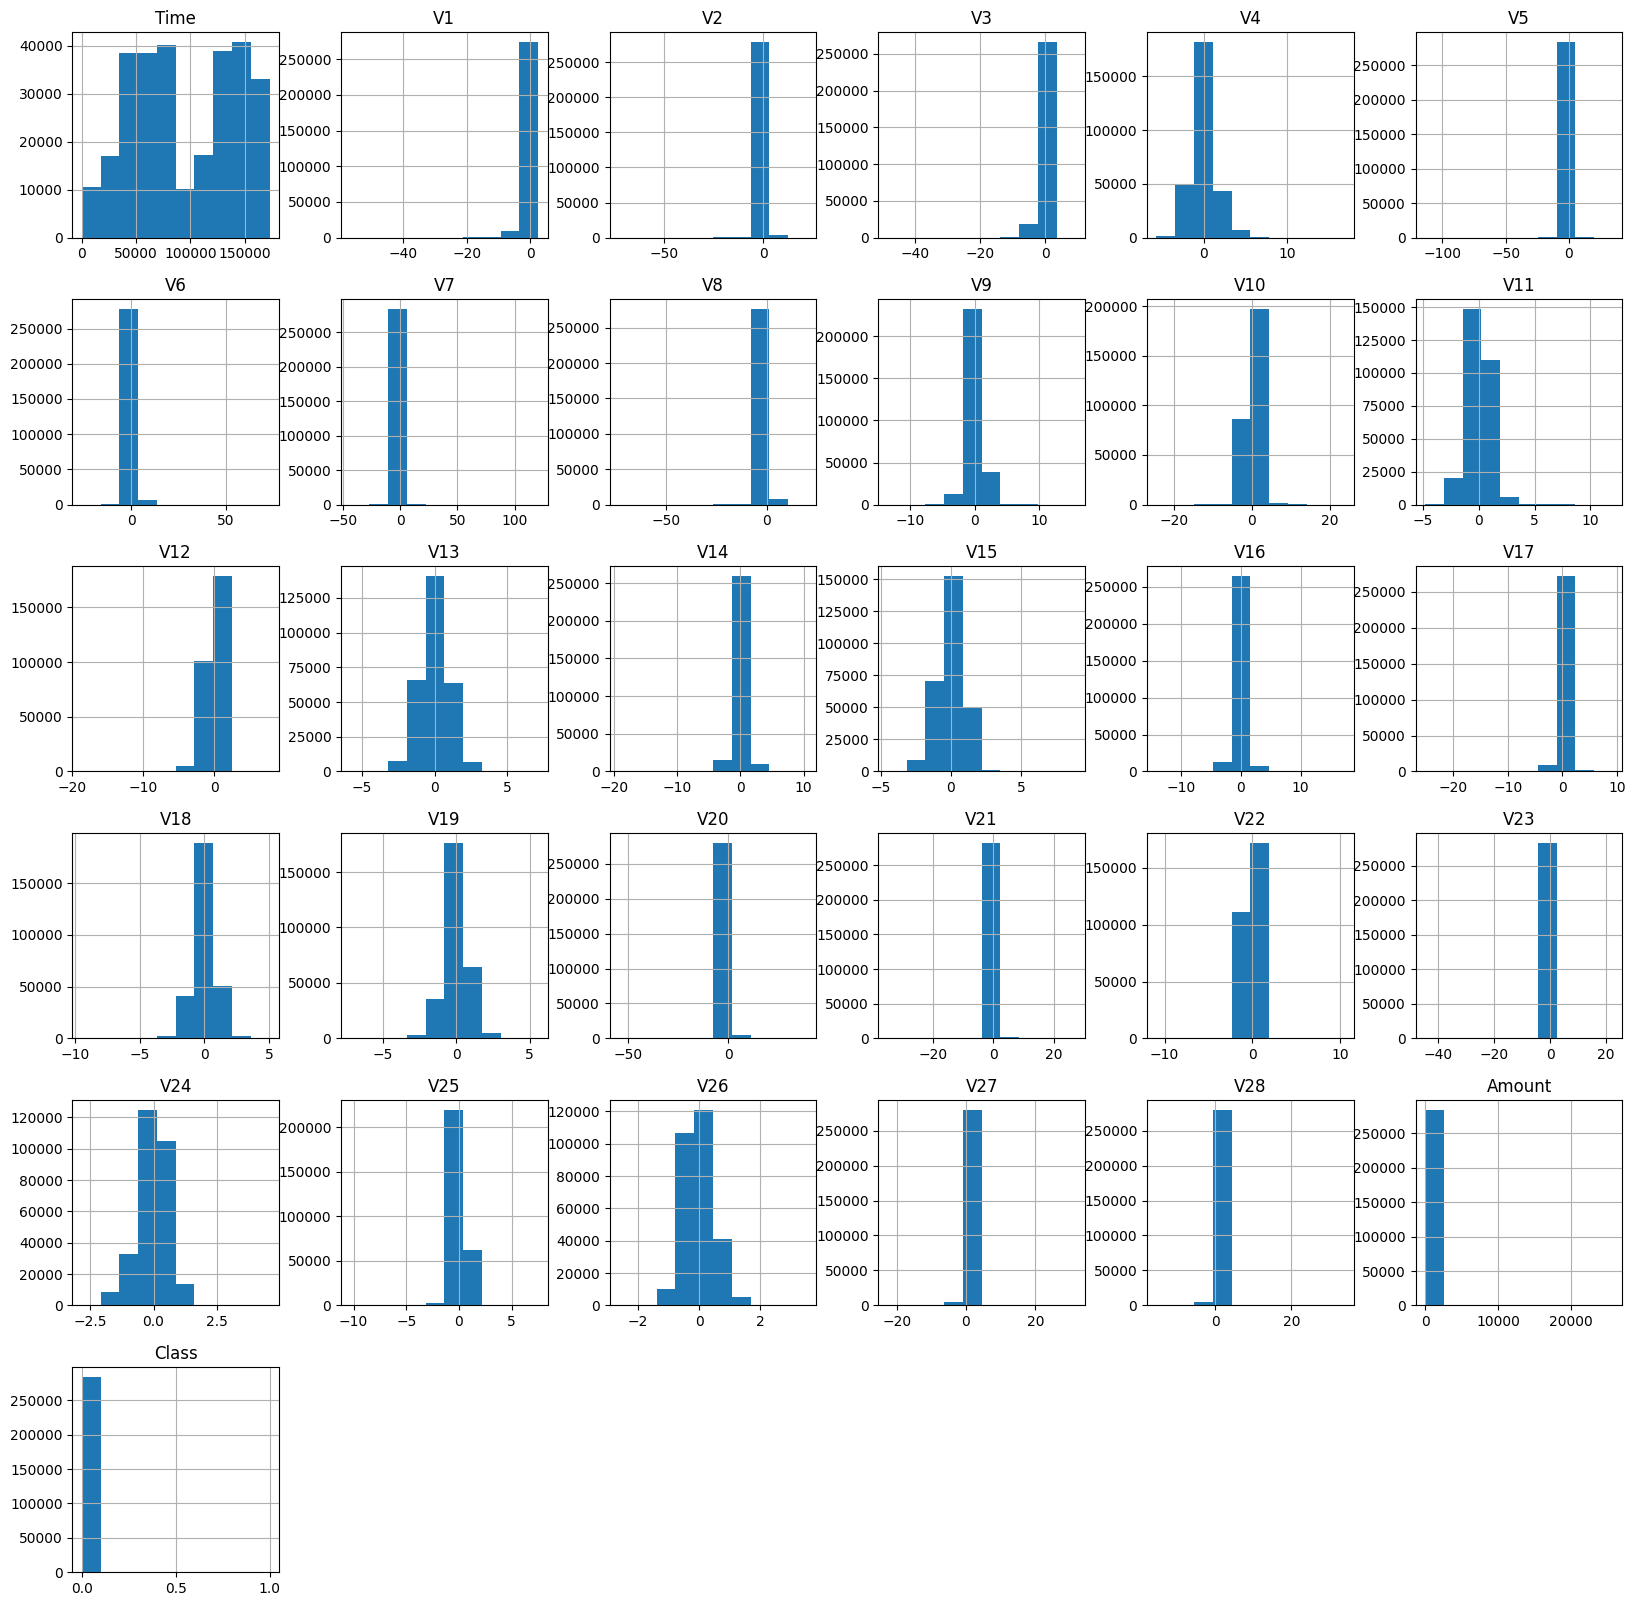

In [14]:
data.hist(figsize = (20, 20))
plt.show()

### Insight:
By examining the histogram for the 'Amount' feature, we can identify the most common transaction amounts and observe the concentration of transaction values in certain ranges. Additionally, it allows us to detect any potential outliers or extreme values that may indicate irregular or fraudulent transactions.

Similarly, the histogram for the 'Time' feature helps us understand the patterns in transaction timings. It may reveal peak periods of transaction activity or periods of reduced activity, offering valuable insights into the temporal behavior of the transactions.

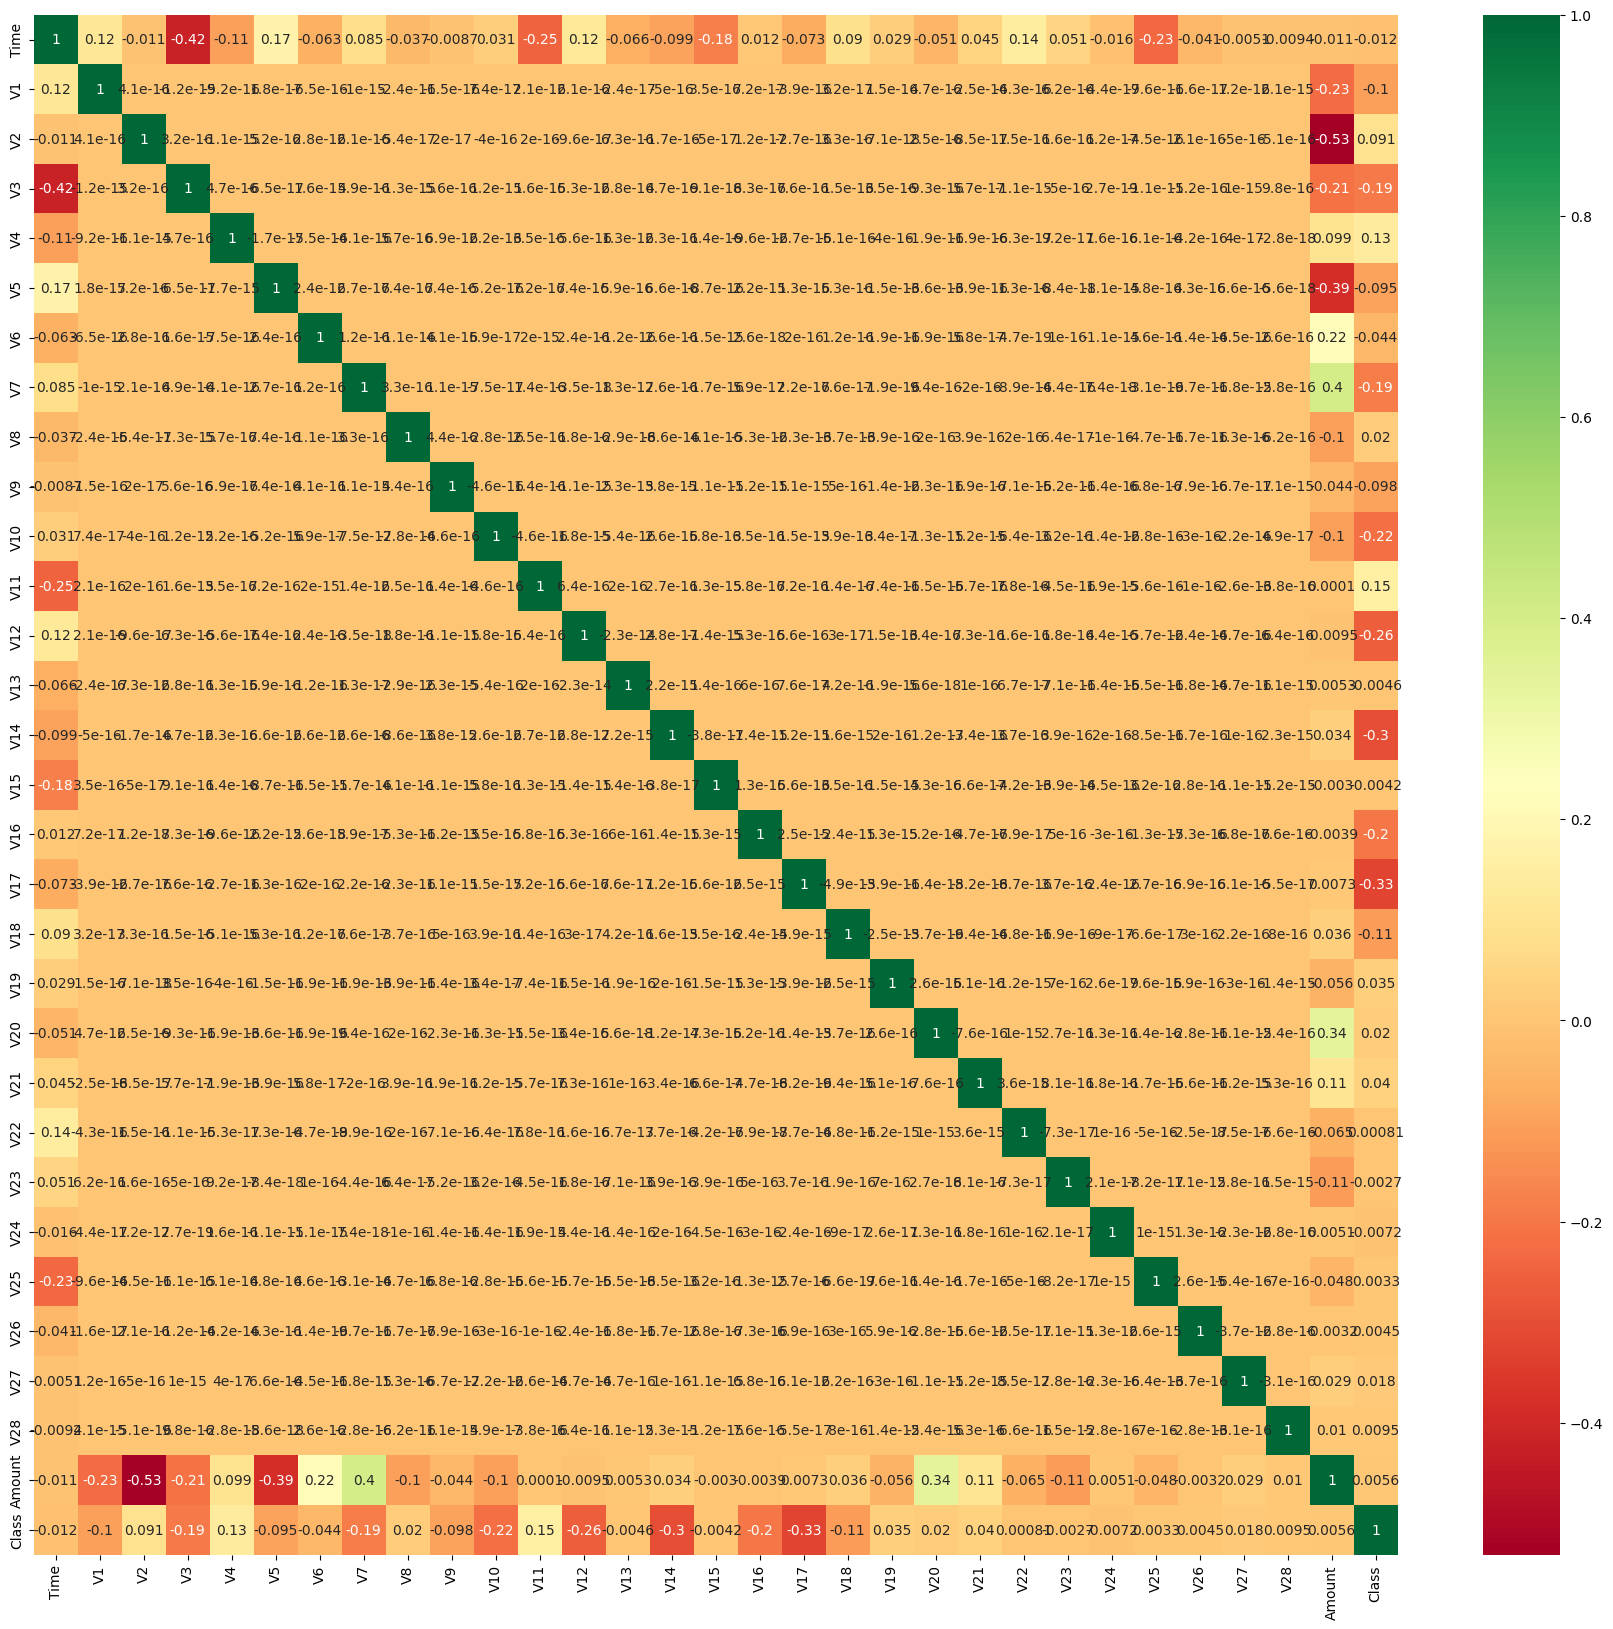

In [15]:
## Correlation of each feature in the dataset
import seaborn as sns
corrmat = data.corr()
corr_features = corrmat.index
plt.figure(figsize=(22,20))
#plot heat map
g=sns.heatmap(data[corr_features].corr(),annot=True,cmap="RdYlGn")

### Exploratory Data Analysis to better understand the dataset

In [16]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## 4. Splitting Data

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 0)

In [18]:
print("xtrain.shape : ", xtrain.shape)
print("xtest.shape  : ", xtest.shape)
print("ytrain.shape : ", ytrain.shape)
print("ytest.shape  : ", ytest.shape)

xtrain.shape :  (213605, 29)
xtest.shape  :  (71202, 29)
ytrain.shape :  (213605,)
ytest.shape  :  (71202,)


## Decision Tree Classifier

In [19]:
stdsc = StandardScaler()
xtrain = stdsc.fit_transform(xtrain)
xtest = stdsc.transform(xtest)

In [20]:
print("Training Set after Standardised : \n", xtrain[0])

Training Set after Standardised : 
 [ 1.04272047  0.06657394 -1.19051456  0.05060912  0.18235446 -1.31399333
  0.58133086 -0.40257892 -0.09319222  0.16481198  1.60036637  1.18028602
 -0.24273404  1.08764203 -0.35935009 -0.76863613 -0.28881862 -0.39536117
  0.13774039 -0.34055771  0.32484688  1.13026957  0.03716189  0.90724443
  0.61754959  0.39904973 -0.21031503 -0.2607924  -0.35356699]


In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [22]:
y_pred_decision_tree = classifier.predict(xtest)

In [23]:
print("y_pred_decision_tree : \n", y_pred_decision_tree)

y_pred_decision_tree : 
 [0 0 0 ... 0 0 0]


In [24]:
com_decision = confusion_matrix(ytest, y_pred_decision_tree)
print("confusion Matrix : \n", com_decision)

confusion Matrix : 
 [[71052    30]
 [   25    95]]


In [25]:
Accuracy_Model = ((com_decision[0][0] + com_decision[1][1]) / com_decision.sum()) *100
print("Accuracy_Decison    : ", Accuracy_Model)

Error_rate_Model= ((com_decision[0][1] + com_decision[1][0]) / com_decision.sum()) *100
print("Error_rate_Decison  : ", Error_rate_Model)

# True Fake Rate
Specificity_Model= (com_decision[1][1] / (com_decision[1][1] + com_decision[0][1])) *100
print("Specificity_Decison : ", Specificity_Model)

# True Genuine Rate
Sensitivity_Model = (com_decision[0][0] / (com_decision[0][0] + com_decision[1][0])) *100
print("Sensitivity_Decison : ", Sensitivity_Model)

Accuracy_Decison    :  99.92275497879272
Error_rate_Decison  :  0.07724502120726946
Specificity_Decison :  76.0
Sensitivity_Decison :  99.96482687789299


### Conclusion:
1. The Accuracy_Model gives the overall accuracy of the model, which represents how well it predicts both fraudulent and genuine transactions
2. The Error_rate_Model provides the percentage of incorrect predictions. Lower error rates are better.
3. The Specificity_Model indicates the model's ability to correctly identify genuine transactions. A higher specificity is preferred, as it means fewer genuine transactions are misclassified as fraudulent.
4. The Sensitivity_Model represents the model's ability to detect fraudulent transactions. A higher sensitivity is crucial for credit card fraud detection, as missing fraudulent transactions could have severe consequences.